In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Data from https://www.knmi.nl/nederland-nu/klimatologie/daggegevens
df = pd.read_csv("data/etmgeg_240.txt", skiprows=47, low_memory=False)
df = df.rename(columns=lambda x: x.strip())
relevant_columns = [
    'YYYYMMDD',
    'FG',  # Daily mean wind speed (in 0.1 m / s)
    'TG',  # Daily mean temperature in (0.1 degrees Celsius)
    'TN',  # Minimum temperature (in 0.1 degrees Celsius)
    'TX',  # Maximum temperature (in 0.1 degrees Celsius)
    'SQ',  # Sunshine duration (in 0.1 hour)
    'RH',  # Daily precipitation amount (in 0.1 mm)
    'NG',  # Mean daily cloud cover (in octants, 9=sky invisible)
]
df = df[relevant_columns]
df = df.rename(
    columns={
        'FG': 'MeanWindSpeed',
        'TG': 'MeanTemperature',
        'TN': 'MinTemperature',
        'TX': 'MaxTemperature',
        'SQ': 'SunshineDuration',
        'RH': 'PrecipitationAmount',
        'NG': 'MeanCloudCover',
    })
df['MeanCloudCover'] = pd.to_numeric(df['MeanCloudCover'], errors='coerce')
df['SunshineDuration'] = pd.to_numeric(df['SunshineDuration'], errors='coerce')
df['PrecipitationAmount'] = pd.to_numeric(df['PrecipitationAmount'], errors='coerce')
df = df.fillna(0)
df['YYYYMMDD2'] = pd.to_datetime(df['YYYYMMDD'], format="%Y%m%d")
df['YYYY'] = df['YYYYMMDD2'].map(lambda x: x.year)
df['MM'] = df['YYYYMMDD2'].map(lambda x: x.month)
df['DD'] = df['YYYYMMDD2'].map(lambda x: x.day)
df = df.set_index('YYYYMMDD')
df.head()

,MeanWindSpeed,MeanTemperature,MinTemperature,MaxTemperature,SunshineDuration,PrecipitationAmount,MeanCloudCover,YYYYMMDD2,YYYY,MM,DD
YYYYMMDD,,,,,,,,,,,
19510101,87,12,-13,26,0.0,0.0,7.0,1951-01-01,1951,1,1
19510102,41,13,7,18,0.0,0.0,8.0,1951-01-02,1951,1,2
19510103,21,3,-20,16,0.0,0.0,6.0,1951-01-03,1951,1,3
19510104,77,12,-7,19,0.0,0.0,7.0,1951-01-04,1951,1,4
19510105,87,48,18,84,0.0,0.0,8.0,1951-01-05,1951,1,5


/Users/rchaves/.pyenv/versions/3.6.6/lib/python3.6/site-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if __name__ == '__main__':
/Users/rchaves/.pyenv/versions/3.6.6/lib/python3.6/site-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  app.launch_new_instance()


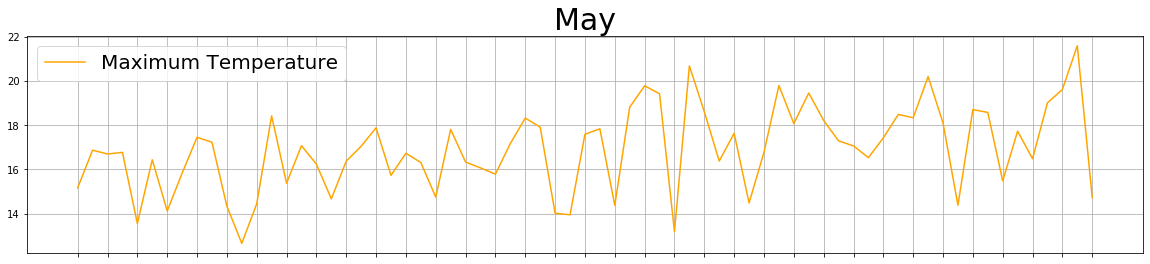

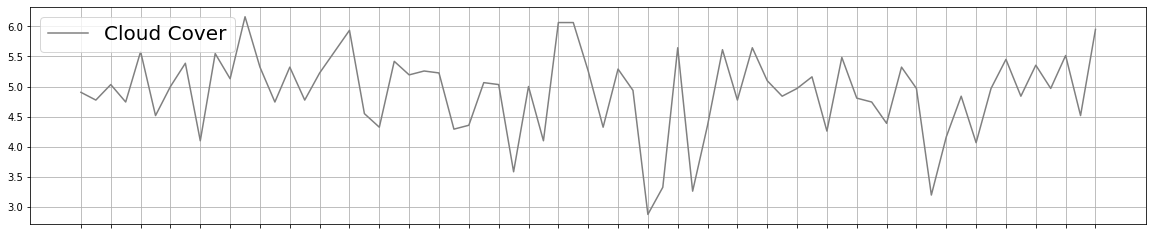

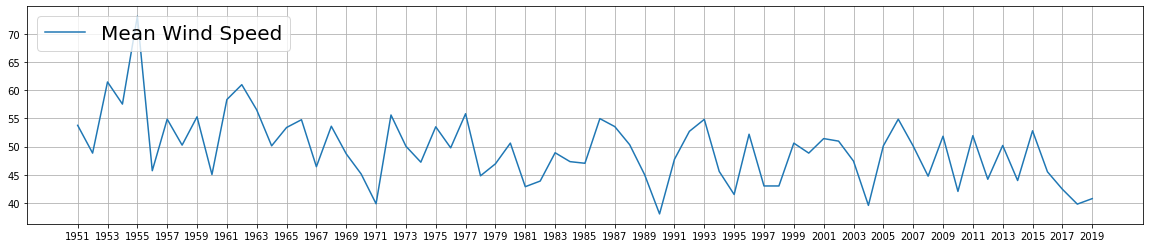

In [3]:
may = df[df['MM'] == 5]
may_avgs = may.groupby(['YYYY']).mean().reset_index()

plt.figure(figsize=(20,4))
plt.plot(may_avgs['YYYY'], may_avgs['MaxTemperature'] / 10.0, color='orange', label='Maximum Temperature')
plt.legend(fontsize=20, loc="upper left")#, fontproperties = prop)
plt.title("May", fontsize=30)
plt.xticks(np.arange(1951, 2020, 2))
plt.axes().set_xticklabels([])
plt.grid()

plt.figure(figsize=(20,4))
plt.plot(may_avgs['YYYY'], may_avgs['MeanCloudCover'], color='grey', label='Cloud Cover')
plt.legend(fontsize=20, loc="upper left")#, fontproperties = prop)
plt.xticks(np.arange(1951, 2020, 2))
plt.axes().set_xticklabels([])
plt.grid()

plt.figure(figsize=(20,4))
plt.plot(may_avgs['YYYY'], may_avgs['MeanWindSpeed'], label='Mean Wind Speed')
plt.legend(fontsize=20, loc="upper left")#, fontproperties = prop)
plt.xticks(np.arange(1951, 2020, 2))
plt.grid()

plt.show()

/Users/rchaves/.pyenv/versions/3.6.6/lib/python3.6/site-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if __name__ == '__main__':
/Users/rchaves/.pyenv/versions/3.6.6/lib/python3.6/site-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  app.launch_new_instance()


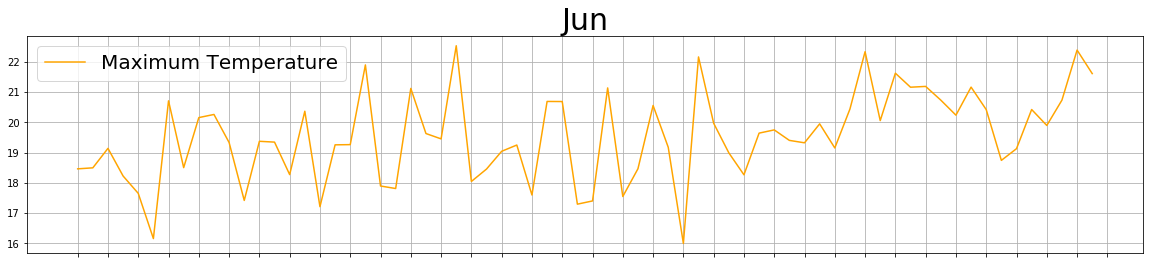

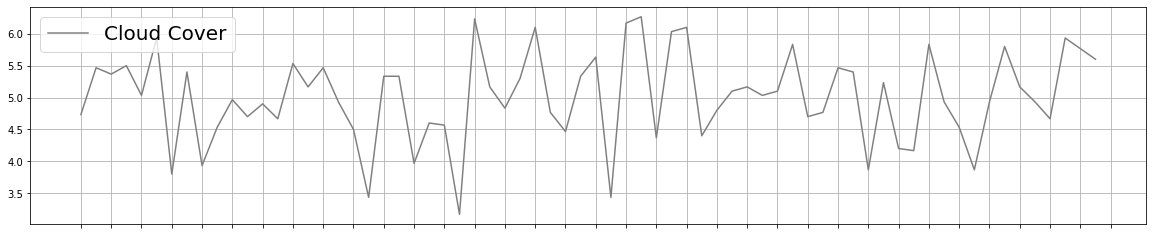

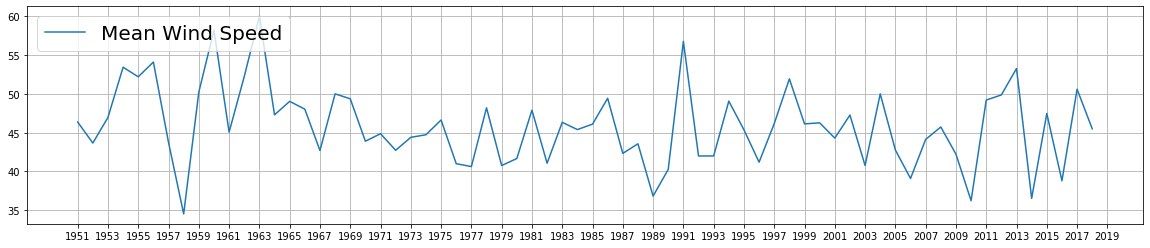

In [4]:
jun = df[df['MM'] == 6]
jun_avgs = jun.groupby(['YYYY']).mean().reset_index()

plt.figure(figsize=(20,4))
plt.plot(jun_avgs['YYYY'], jun_avgs['MaxTemperature'] / 10.0, color='orange', label='Maximum Temperature')
plt.legend(fontsize=20, loc="upper left")#, fontproperties = prop)
plt.title("Jun", fontsize=30)
plt.xticks(np.arange(1951, 2020, 2))
plt.axes().set_xticklabels([])
plt.grid()

plt.figure(figsize=(20,4))
plt.plot(jun_avgs['YYYY'], jun_avgs['MeanCloudCover'], color='grey', label='Cloud Cover')
plt.legend(fontsize=20, loc="upper left")#, fontproperties = prop)
plt.xticks(np.arange(1951, 2020, 2))
plt.axes().set_xticklabels([])
plt.grid()

plt.figure(figsize=(20,4))
plt.plot(jun_avgs['YYYY'], jun_avgs['MeanWindSpeed'], label='Mean Wind Speed')
plt.legend(fontsize=20, loc="upper left")#, fontproperties = prop)
plt.xticks(np.arange(1951, 2020, 2))
plt.grid()

plt.show()

In [5]:
from datetime import date, timedelta

X = pd.DataFrame()
cols = [
    'MeanWindSpeed', 'MeanTemperature', 'MinTemperature', 'MaxTemperature',
    'SunshineDuration', 'PrecipitationAmount', 'MeanCloudCover'
]
for year in range(1953, 2019 + 1):
    for month in range(1, 12 + 1):
        if year == 2019 and month == 6:
            break
        row = pd.DataFrame()
        dt = date(year, month, 1)
        dt_pasts = [ int((dt - timedelta(days=day)).strftime("%Y%m%d")) for day in range(1, 365 + 1) ]
        prev_rows = df.loc[dt_pasts].reset_index()
        prev_rows['d-minus'] = [ str(i + 1) + 'd_ago' for i in range(len(prev_rows)) ]
        prev_rows = prev_rows.set_index('d-minus')
        for col in cols:
            prev_rows_col = prev_rows[[col]].T
            prev_rows_col = prev_rows_col.rename(lambda x: col + '_' + x, axis='columns')
            prev_rows_col = prev_rows_col.reset_index().drop(['index'], axis='columns')
            row = pd.concat([row, prev_rows_col], axis=1, sort=False)
        row['YYYYMM'] = int(date(year, month, 1).strftime("%Y%m"))
        means = df[(df['MM'] == month) & (df['YYYY'] == year)].mean()
        for col in cols:
            row[col + '_Mean'] = means[col]
        X = pd.concat([X, row])

X = X.reset_index(drop=True)
del X.columns.name
X.head()

,MeanWindSpeed_1d_ago,MeanWindSpeed_2d_ago,MeanWindSpeed_3d_ago,MeanWindSpeed_4d_ago,MeanWindSpeed_5d_ago,MeanWindSpeed_6d_ago,MeanWindSpeed_7d_ago,MeanWindSpeed_8d_ago,MeanWindSpeed_9d_ago,MeanWindSpeed_10d_ago,...,MeanCloudCover_364d_ago,MeanCloudCover_365d_ago,YYYYMM,MeanWindSpeed_Mean,MeanTemperature_Mean,MinTemperature_Mean,MaxTemperature_Mean,SunshineDuration_Mean,PrecipitationAmount_Mean,MeanCloudCover_Mean
0,77,26,41,51,10,62,62,77,36,41,...,4.0,7.0,195301,44.483871,17.548387,-3.645161,35.645161,0.0,0.0,7.096774
1,175,67,87,113,139,36,26,57,26,41,...,6.0,4.0,195302,66.178571,25.678571,3.678571,48.678571,0.0,0.0,6.214286
2,57,31,21,36,57,103,103,129,87,62,...,7.0,5.0,195303,58.548387,48.548387,12.129032,92.225806,0.0,0.0,5.290323
3,108,144,190,118,36,72,15,15,26,46,...,3.0,3.0,195304,64.600000,83.700000,45.966667,120.600000,0.0,0.0,4.933333
4,82,82,77,57,62,36,46,62,77,72,...,4.0,2.0,195305,61.483871,125.258065,81.677419,166.967742,0.0,0.0,5.032258


In [6]:
train = X[X['YYYYMM'] < 201701]
test = X[X['YYYYMM'] >= 201701]

X_train = train.drop(columns=[x + "_Mean" for x in cols])
y_train = train["MaxTemperature_Mean"]
X_test = test.drop(columns=[x + "_Mean" for x in cols])
y_test = test["MaxTemperature_Mean"]

X_train.head()

,MeanWindSpeed_1d_ago,MeanWindSpeed_2d_ago,MeanWindSpeed_3d_ago,MeanWindSpeed_4d_ago,MeanWindSpeed_5d_ago,MeanWindSpeed_6d_ago,MeanWindSpeed_7d_ago,MeanWindSpeed_8d_ago,MeanWindSpeed_9d_ago,MeanWindSpeed_10d_ago,...,MeanCloudCover_357d_ago,MeanCloudCover_358d_ago,MeanCloudCover_359d_ago,MeanCloudCover_360d_ago,MeanCloudCover_361d_ago,MeanCloudCover_362d_ago,MeanCloudCover_363d_ago,MeanCloudCover_364d_ago,MeanCloudCover_365d_ago,YYYYMM
0,77,26,41,51,10,62,62,77,36,41,...,7.0,7.0,7.0,8.0,6.0,6.0,5.0,4.0,7.0,195301
1,175,67,87,113,139,36,26,57,26,41,...,7.0,4.0,5.0,7.0,8.0,2.0,4.0,6.0,4.0,195302
2,57,31,21,36,57,103,103,129,87,62,...,7.0,8.0,7.0,7.0,5.0,4.0,6.0,7.0,5.0,195303
3,108,144,190,118,36,72,15,15,26,46,...,6.0,7.0,8.0,6.0,2.0,6.0,2.0,3.0,3.0,195304
4,82,82,77,57,62,36,46,62,77,72,...,5.0,2.0,4.0,5.0,6.0,6.0,6.0,4.0,2.0,195305


Train score: 1.0
Test score: 0.8178722063434326


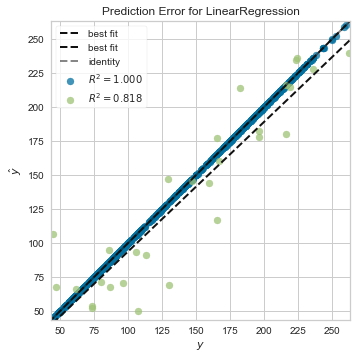

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from yellowbrick.regressor import PredictionError

model = PredictionError(LinearRegression())
model.fit(X_train, y_train)

print("Train score:", model.score(X_train, y_train))
print("Test score:", model.score(X_test, y_test))
model.poof()

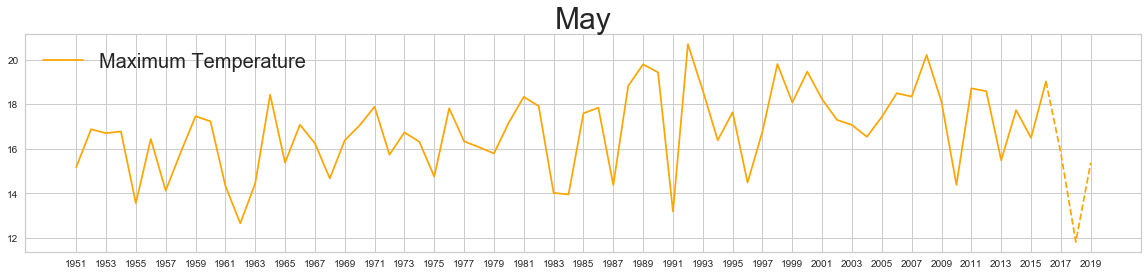

In [11]:
may = df[(df['MM'] == 5) & (df['YYYY'] < 2017)]
may_avgs = may.groupby(['YYYY']).mean().reset_index()
may_avgs['MaxTemperature'] /= 10

X_predict = X_test[(X_test['YYYYMM'] == 201904) | (X_test['YYYYMM'] == 201804) | (X_test['YYYYMM'] == 201704)]
predictions = model.predict(X_predict) / 10.0
last_value = may_avgs[may_avgs['YYYY'] == 2016]['MaxTemperature'].values[0]
predictions = np.insert(predictions, 0, last_value, axis=0)

plt.figure(figsize=(20,4))
plt.plot(may_avgs['YYYY'], may_avgs['MaxTemperature'], color='orange', label='Maximum Temperature')
plt.plot(range(2016, 2020), predictions, color='orange', linestyle='dashed')
plt.legend(fontsize=20, loc="upper left")
plt.title("May", fontsize=30)
plt.xticks(np.arange(1951, 2020, 2))
plt.grid(True)
plt.show()

Train score: 1.0
Test score: 0.8178722063434326


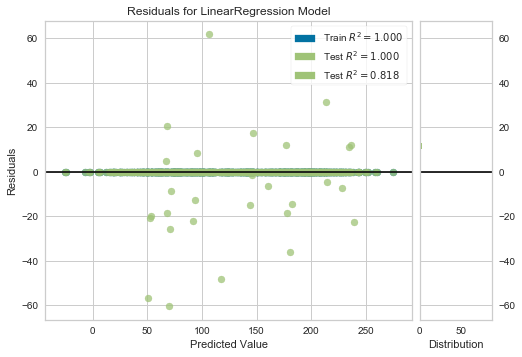

In [9]:
from yellowbrick.regressor import ResidualsPlot

model = ResidualsPlot(LinearRegression())
model.fit(X_train, y_train)

print("Train score:", model.score(X_train, y_train))
print("Test score:", model.score(X_test, y_test))
model.poof()

/Users/rchaves/.pyenv/versions/3.6.6/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/rchaves/.pyenv/versions/3.6.6/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/rchaves/.pyenv/versions/3.6.6/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Train score: 0.9219563888016363
Test score: 0.8747814846243742


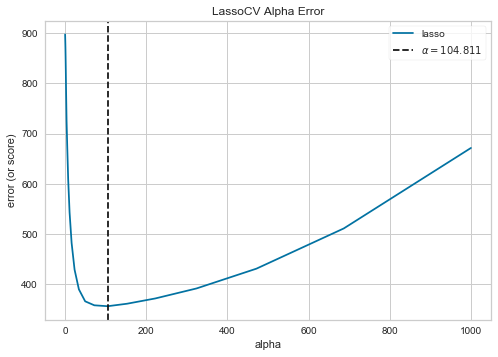

In [13]:
from sklearn.linear_model import LassoCV
from yellowbrick.regressor import AlphaSelection

# Create a list of alphas to cross-validate against
alphas = np.logspace(-5, 3, 50)

model = AlphaSelection(LassoCV(alphas=alphas, cv=3))

model.fit(X_train, y_train)

print("Train score:", model.score(X_train, y_train))
print("Test score:", model.score(X_test, y_test))
model.poof()

<Figure size 576x396 with 0 Axes>

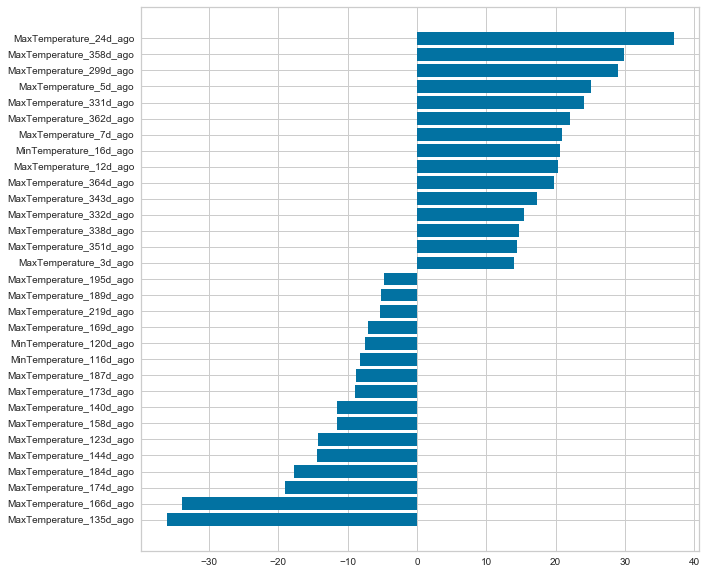

In [60]:
from yellowbrick.features.importances import FeatureImportances
from sklearn.linear_model import Lasso

fig, ax = plt.subplots()
model = FeatureImportances(Lasso(alpha=104), ax = ax)
model.fit(X_train, y_train)
plt.gcf().clear()

plt.figure(figsize=(10,10))

less_important_labels, less_important = (list(model.features_[0:16]), list(model.feature_importances_[0:16]))
more_important_labels, more_important = (list(model.features_[-16:-1]), list(model.feature_importances_[-16:-1]))

plt.barh(less_important_labels + more_important_labels, less_important + more_important)
plt.show()